Estadistica descriptiva:

Estadistica inferencial:



In [424]:
import datetime as dt
import pandas as pd
import numpy as np

from pandas_datareader import data as pdr
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import yfinance as yf


from pandas_datareader import data as pdr

In [425]:
ruta_archivo = '../btc/Data/btc_limp.csv'

btc = pd.read_csv(ruta_archivo)


In [426]:
#btc['Change %'] = btc['Change %'].str.rstrip('%').astype(float)

In [427]:
# Obteniendo la cardinalidad de las variables el porcentaje y el tipo

df_tipificacion = pd.DataFrame([btc.nunique(), btc.nunique()/len(btc) * 100, btc.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})
df_tipificacion

# cardinalidad superior al 30 porciento se consideran continuas y el resto discretas...
# los 100 seran indices

,Card,%_Card,Tipo
Date,4992,100.0,object
Open,3127,62.640224,int64
Change %,1547,30.989583,float64


In [428]:
# medidas de tendencia central

btc ['Change %'].describe().loc ['mean']

0.416386217948718

In [429]:
#esto es la mediana

btc.describe().loc ['50%']

Open        1850.0
Change %       0.0
Name: 50%, dtype: float64

In [483]:
btc.head ()

,Open,Change %
Date,,
2024-03-18,68389,-1.17
2024-03-17,65314,4.71
2024-03-16,69456,-5.97
2024-03-15,71387,-2.69
2024-03-14,73066,-2.30


In [484]:
btc.describe ()

,Open,Change %
count,3730.000000,3730.000000
mean,14346.883378,0.267233
std,16771.160650,7.132265
min,111.000000,-57.210000
25%,647.250000,-1.277500
50%,7614.000000,0.100000
75%,23527.000000,1.710000
max,73066.000000,336.840000


In [485]:
btc.describe ().loc ['max']

Open        73066.00
Change %      336.84
Name: max, dtype: float64

In [433]:
porcentaje = btc ['Change %']

porcentaje.value_counts ()

Change %
 0.00      428
-0.59       18
-0.12       15
 0.47       15
 0.19       14
-0.43       14
 0.91       14
 0.23       14
 0.22       13
 0.37       13
 0.65       13
-0.06       13
-0.41       13
 0.56       12
-0.13       12
 0.20       12
-0.15       12
-0.50       12
-0.24       12
 0.13       12
-0.19       12
-0.33       12
-0.36       12
-0.91       12
 0.34       11
 0.43       11
 0.60       11
 0.35       11
-0.96       11
-0.60       11
-0.27       11
-0.20       11
 0.84       11
 0.49       11
-0.04       11
-0.95       11
-0.14       10
 0.72       10
-1.23       10
-0.08       10
 0.55       10
 1.64       10
-0.17       10
 0.86       10
 0.54       10
 0.51       10
 0.05       10
-0.37       10
-0.64       10
-0.54       10
-0.75       10
 1.10       10
 0.03       10
-0.32       10
-1.61       10
 0.32        9
 0.24        9
 0.88        9
 0.18        9
-1.00        9
-0.90        9
 0.15        9
-0.47        9
 1.30        9
 0.83        9
-0.25        9
-

In [434]:
btc['Date'] = pd.to_datetime(btc['Date'])  # Convertir la columna 'Date' al tipo de dato datetime
btc.set_index('Date', inplace=True)  # Establecer la columna 'Date' como el índice


btc = btc.loc['2014-01-01':]


btc.head ()


,Open,Change %
Date,,
2024-03-18,68389,-1.17
2024-03-17,65314,4.71
2024-03-16,69456,-5.97
2024-03-15,71387,-2.69
2024-03-14,73066,-2.30


In [435]:
data = btc ['Open']

data = pd.DataFrame (data)

In [436]:
data ['retornos']= data ['Open'].pct_change ().round (4)



In [437]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

data.head

<bound method NDFrame.head of              Open  retornos
Date                       
2024-03-18  68389       NaN
2024-03-17  65314   -0.0450
2024-03-16  69456    0.0634
2024-03-15  71387    0.0278
2024-03-14  73066    0.0235
2024-03-13  71461   -0.0220
2024-03-12  72099    0.0089
2024-03-11  68964   -0.0435
2024-03-10  68360   -0.0088
2024-03-09  68178   -0.0027
2024-03-08  66854   -0.0194
2024-03-07  66074   -0.0117
2024-03-06  63794   -0.0345
2024-03-05  68273    0.0702
2024-03-04  63135   -0.0753
2024-03-03  61955   -0.0187
2024-03-02  62397    0.0071
2024-03-01  61157   -0.0199
2024-02-29  62467    0.0214
2024-02-28  57048   -0.0867
2024-02-27  54491   -0.0448
2024-02-26  51722   -0.0508
2024-02-25  51572   -0.0029
2024-02-24  50739   -0.0162
2024-02-23  51320    0.0115
2024-02-22  51850    0.0103
2024-02-21  52263    0.0080
2024-02-20  51783   -0.0092
2024-02-19  52119    0.0065
2024-02-18  51646   -0.0091
2024-02-17  52134    0.0094
2024-02-16  51901   -0.0045
2024-02-15  51805 

In [438]:
data ['retornos'].value_counts ()

retornos
-0.0000    80
 0.0044    18
 0.0017    18
-0.0024    17
 0.0022    15
 0.0042    14
-0.0072    13
-0.0085    13
 0.0016    13
-0.0106    12
-0.0047    12
-0.0071    12
-0.0044    12
-0.0049    11
-0.0017    11
 0.0024    11
-0.0022    11
-0.0083    11
-0.0016    11
 0.0105    10
 0.0076    10
-0.0009    10
 0.0045    10
-0.0021    10
-0.0028    10
 0.0046    10
-0.0042    10
 0.0027    10
-0.0023    10
 0.0061     9
-0.0052     9
-0.0128     9
 0.0059     9
 0.0069     9
 0.0043     9
 0.0141     9
 0.0041     9
 0.0125     9
 0.0057     9
 0.0034     9
-0.0172     9
 0.0008     9
 0.0021     9
-0.0082     9
 0.0073     9
-0.0026     9
-0.0055     9
 0.0089     9
-0.0036     9
 0.0080     8
-0.0166     8
-0.0146     8
 0.0011     8
 0.0031     8
 0.0077     8
-0.0032     8
-0.0174     8
-0.0219     8
-0.0081     8
 0.0095     8
 0.0094     8
-0.0067     8
 0.0083     8
-0.0136     8
-0.0050     8
 0.0047     8
-0.0140     8
-0.0019     8
-0.0090     8
-0.0105     8
-0.0086    

In [439]:
retorno = data ['retornos']

retorno

Date
2024-03-18       NaN
2024-03-17   -0.0450
2024-03-16    0.0634
2024-03-15    0.0278
2024-03-14    0.0235
2024-03-13   -0.0220
2024-03-12    0.0089
2024-03-11   -0.0435
2024-03-10   -0.0088
2024-03-09   -0.0027
2024-03-08   -0.0194
2024-03-07   -0.0117
2024-03-06   -0.0345
2024-03-05    0.0702
2024-03-04   -0.0753
2024-03-03   -0.0187
2024-03-02    0.0071
2024-03-01   -0.0199
2024-02-29    0.0214
2024-02-28   -0.0867
2024-02-27   -0.0448
2024-02-26   -0.0508
2024-02-25   -0.0029
2024-02-24   -0.0162
2024-02-23    0.0115
2024-02-22    0.0103
2024-02-21    0.0080
2024-02-20   -0.0092
2024-02-19    0.0065
2024-02-18   -0.0091
2024-02-17    0.0094
2024-02-16   -0.0045
2024-02-15   -0.0018
2024-02-14   -0.0405
2024-02-13    0.0047
2024-02-12   -0.0333
2024-02-11   -0.0108
2024-02-10   -0.0132
2024-02-09   -0.0389
2024-02-08   -0.0209
2024-02-07   -0.0284
2024-02-06   -0.0091
2024-02-05   -0.0027
2024-02-04    0.0100
2024-02-03    0.0044
2024-02-02   -0.0026
2024-02-01   -0.0117
2024-01-

In [440]:
media_retornos = retorno.mean()

media_retornos


1.6385089836417073e-05

In [441]:
mediana_retornos = retorno.median()

media_retornos

1.6385089836417073e-05

In [442]:
desviacion_estandar_retornos = retorno.std()

desviacion_estandar_retornos

0.04968676769879292

In [443]:
retorno_minimo = retorno.min()
retorno_maximo = retorno.max()

print (retorno_minimo)
print ("\n"*3)
print (retorno_maximo)

-0.7723




1.3514


In [444]:
percentil_25 = retorno.quantile(0.25)
percentil_75 = retorno.quantile(0.75)

print (percentil_25)
print ("\n"*2)
print (percentil_75)

-0.017



0.0129


In [445]:
rango_intercuartilico = percentil_75 - percentil_25

rango_intercuartilico

0.029900000000000003

In [446]:
asimetria = retorno.skew()

asimetria

5.996712902878957

In [447]:
kurtosis_retornos = retorno.kurtosis()

kurtosis_retornos

192.0288754091613

In [448]:
varianza_retornos = retorno.var()

varianza_retornos

0.0024687748843538115

In [449]:
coeficiente_de_variacion = (desviacion_estandar_retornos / media_retornos) * 100

coeficiente_de_variacion

303243.79173289856

In [450]:
valores_unicos = retorno.unique()
frecuencia_valores = retorno.value_counts()

print (valores_unicos)
print ("\n"*3)
print (frecuencia_valores)

[    nan -0.045   0.0634 ...  0.1513 -0.0317 -0.0479]




retornos
-0.0000    80
 0.0044    18
 0.0017    18
-0.0024    17
 0.0022    15
 0.0042    14
-0.0072    13
-0.0085    13
 0.0016    13
-0.0106    12
-0.0047    12
-0.0071    12
-0.0044    12
-0.0049    11
-0.0017    11
 0.0024    11
-0.0022    11
-0.0083    11
-0.0016    11
 0.0105    10
 0.0076    10
-0.0009    10
 0.0045    10
-0.0021    10
-0.0028    10
 0.0046    10
-0.0042    10
 0.0027    10
-0.0023    10
 0.0061     9
-0.0052     9
-0.0128     9
 0.0059     9
 0.0069     9
 0.0043     9
 0.0141     9
 0.0041     9
 0.0125     9
 0.0057     9
 0.0034     9
-0.0172     9
 0.0008     9
 0.0021     9
-0.0082     9
 0.0073     9
-0.0026     9
-0.0055     9
 0.0089     9
-0.0036     9
 0.0080     8
-0.0166     8
-0.0146     8
 0.0011     8
 0.0031     8
 0.0077     8
-0.0032     8
-0.0174     8
-0.0219     8
-0.0081     8
 0.0095     8
 0.0094     8
-0.0067     8
 0.0083     8
-0.0136     8
-0.0050     8
 0.0047     8
-0.0140  

In [451]:
suma_acumulada = retorno.cumsum()

suma_acumulada

Date
2024-03-18       NaN
2024-03-17   -0.0450
2024-03-16    0.0184
2024-03-15    0.0462
2024-03-14    0.0697
2024-03-13    0.0477
2024-03-12    0.0566
2024-03-11    0.0131
2024-03-10    0.0043
2024-03-09    0.0016
2024-03-08   -0.0178
2024-03-07   -0.0295
2024-03-06   -0.0640
2024-03-05    0.0062
2024-03-04   -0.0691
2024-03-03   -0.0878
2024-03-02   -0.0807
2024-03-01   -0.1006
2024-02-29   -0.0792
2024-02-28   -0.1659
2024-02-27   -0.2107
2024-02-26   -0.2615
2024-02-25   -0.2644
2024-02-24   -0.2806
2024-02-23   -0.2691
2024-02-22   -0.2588
2024-02-21   -0.2508
2024-02-20   -0.2600
2024-02-19   -0.2535
2024-02-18   -0.2626
2024-02-17   -0.2532
2024-02-16   -0.2577
2024-02-15   -0.2595
2024-02-14   -0.3000
2024-02-13   -0.2953
2024-02-12   -0.3286
2024-02-11   -0.3394
2024-02-10   -0.3526
2024-02-09   -0.3915
2024-02-08   -0.4124
2024-02-07   -0.4408
2024-02-06   -0.4499
2024-02-05   -0.4526
2024-02-04   -0.4426
2024-02-03   -0.4382
2024-02-02   -0.4408
2024-02-01   -0.4525
2024-01-

In [452]:
productoria_acumulada = retorno.cumprod()

productoria_acumulada

Date
2024-03-18              NaN
2024-03-17    -4.500000e-02
2024-03-16    -2.853000e-03
2024-03-15    -7.931340e-05
2024-03-14    -1.863865e-06
2024-03-13     4.100503e-08
2024-03-12     3.649447e-10
2024-03-11    -1.587510e-11
2024-03-10     1.397008e-13
2024-03-09    -3.771923e-16
2024-03-08     7.317530e-18
2024-03-07    -8.561511e-20
2024-03-06     2.953721e-21
2024-03-05     2.073512e-22
2024-03-04    -1.561355e-23
2024-03-03     2.919733e-25
2024-03-02     2.073011e-27
2024-03-01    -4.125291e-29
2024-02-29    -8.828123e-31
2024-02-28     7.653983e-32
2024-02-27    -3.428984e-33
2024-02-26     1.741924e-34
2024-02-25    -5.051580e-37
2024-02-24     8.183559e-39
2024-02-23     9.411093e-41
2024-02-22     9.693426e-43
2024-02-21     7.754741e-45
2024-02-20    -7.134361e-47
2024-02-19    -4.637335e-49
2024-02-18     4.219975e-51
2024-02-17     3.966776e-53
2024-02-16    -1.785049e-55
2024-02-15     3.213089e-58
2024-02-14    -1.301301e-59
2024-02-13    -6.116115e-62
2024-02-12     

In [453]:
# Crear una máscara booleana para los valores positivos y negativos
positivos = retorno[retorno > 0]
negativos = retorno[retorno < 0]

# Calcular el número de valores positivos y negativos
num_positivos = len(positivos)
num_negativos = len(negativos)

# Calcular el porcentaje de valores positivos y negativos en relación con el total de retornos
porcentaje_positivos = (num_positivos / len(retorno)) * 100
porcentaje_negativos = (num_negativos / len(retorno)) * 100

print("Porcentaje de retornos positivos:", porcentaje_positivos)
print("Porcentaje de retornos negativos:", porcentaje_negativos)


Porcentaje de retornos positivos: 46.729222520107236
Porcentaje de retornos negativos: 51.09919571045577


In [454]:
retorno.describe ()

count    3729.000000
mean        0.000016
std         0.049687
min        -0.772300
25%        -0.017000
50%        -0.000900
75%         0.012900
max         1.351400
Name: retornos, dtype: float64

In [455]:
# Calcular el primer cuartil (Q1)
Q1 = retorno.quantile(0.25)

# Calcular el tercer cuartil (Q3)
Q3 = retorno.quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

print("Primer cuartil (Q1):", Q1)
print("Tercer cuartil (Q3):", Q3)
print("Rango intercuartílico (IQR):", IQR)




Primer cuartil (Q1): -0.017
Tercer cuartil (Q3): 0.0129
Rango intercuartílico (IQR): 0.029900000000000003


Y eso ¿es mucho o poco? Pues... depende... varias formas de aplicarlo:
* Si el IQR es mucho mayor que la mediana (por ejemplo más de un 50%) podríamos pensar en una variable con valores bastante dispersos (y por tanto las medidas de tendencia central hay que considerarlas con más cuidado)
* Podemos comparar el IQR con la diferencia entre valor máximo y mínimo (lo que veremos en un momento que es el rango) y si el IQR es comparable entonces de nuevo podremos hablar de una variable dispersa.


Si comparamos ni el IQR es mayor que la mediana, ni es una proporción importante del rango (más de 82K$), no es el CLV una variable dispersa, pero sí que tiene valores potencialmente anómalos pero eso lo veremos en otras sesiones. Ahora para casi terminar veamos la forma visual de analizar los cuartiles, la dispersión y en el futuro las anomalías de valores numéricos.

Los [diagramas de cajas](https://es.wikipedia.org/wiki/Diagrama_de_caja) son una presentación visual que describe varias características importantes al mismo tiempo, tales como la dispersión y simetría. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Estos gráficos nos proporcionan abundante información y son sumamente útiles para encontrar [valores atípicos](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico) y comparar dos [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos). 

Por cierto a las líneas entre la caja y los valores "Minimum" y "Maximum" (ojo que no son el min y el max) se le denomina también "bigotes". Cuanto más alargada la caja o más largos los bigotes más dispersos son los valores de la variable pintada. Los valores que quedan por debajo del minimum y del maximum son considerados outliers o anomalías. [Como hemos comentado antes lo veremos en las sesiones finales de la unidad]. 

Antes de aplicarlo a los dos casos (esta vez he preferido no hacerte pasar por la versión numérica de los valores de posición), simplemente comentar que usaremos los boxplot:
1. Para **comparar series de valores entre sí** por ejemplo como son las distribuciones de CLV para cada tipo cliente según su estado.
2. Para **detectar valores anómalos** o outliers.

Cada uno de estos puntos los veremos en su correspondiente sesión. Ahora pintemos diagramas de cajas.

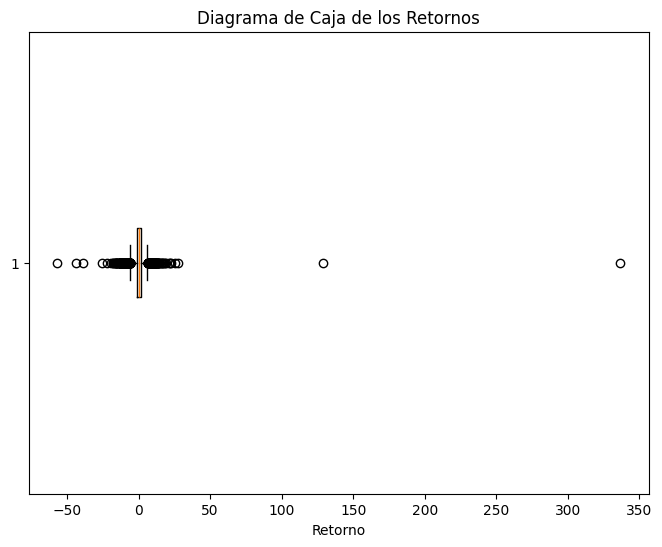

In [456]:

# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(btc ['Change %'], vert=False)

# Añadir etiquetas y título
plt.xlabel('Retorno')
plt.title('Diagrama de Caja de los Retornos')

# Mostrar el boxplot
plt.show()


Para saber si los datos están muy dispersos o se concentran en torno a un valor (caso en el que una de las medidas centrales como la media o la mediana los representarán muy bien), hemos visto ya los percentiles y el rango para hacernos una idea, pero en general lo que se emplea en el caso de los valores numéricos son dos medidas, relacionadas entre sí, y luego métodos visuales basados en dos tipos de gráficas: los histográmas y las graficas de función de densidad de probabilidad [Aunque a esta parte le dedicaremos la siguiente píldora]

# Varianza o sigma cuadrado.
La [varianza](https://es.wikipedia.org/wiki/Varianza) es la media aritmética del cuadrado de las desviaciones respecto a la media de un conjunto de datos (por ejemplo los valores de una de nuestras variables o columnas y, en general, una distribución estadística). La varianza intenta describir la dispersión de los *[datos](https://es.wikipedia.org/wiki/Dato). Básicamente representa lo que varían los datos*. **Como está elevada al cuadrado, la varianza no puede tener las mismas unidades que los datos**. 

Una varianza elevada significa que los datos están más dispersos. Mientras que un valor bajo, indica que los datos están próximos a la media. Se representa como $\sigma^2$. 

Podemos aplicar directamente el concepto de "Coeficiente de Variación" (CV) que es la división de la desviación estándar entre la media. Como pautas generales:

- Un CV menor al 15% suele considerarse como una baja variabilidad.
- Un CV entre 15% y 30% indica una variabilidad moderada.
- Un CV mayor al 30% a menudo se considera como una alta variabilidad.

Estos valores son orientativos y deben interpretarse en el contexto específico de tus datos y el área de estudio.

In [457]:
retorno.describe ()
#desviacion estandar y la media

count    3729.000000
mean        0.000016
std         0.049687
min        -0.772300
25%        -0.017000
50%        -0.000900
75%         0.012900
max         1.351400
Name: retornos, dtype: float64

In [458]:
retorno_por = retorno * 100

retorno_por = pd.DataFrame (retorno_por)

retorno_por.head ()

,retornos
Date,
2024-03-18,NaN
2024-03-17,-4.50
2024-03-16,6.34
2024-03-15,2.78
2024-03-14,2.35


In [459]:
def variabilidad(df):
    # Calcular la descripción estadística
    df_desc = df.describe()
    
    # Seleccionar las filas correspondientes a std y mean
    df_var = df_desc.loc[['std', 'mean']]
    
    # Calcular el coeficiente de variación
    df_var['CV'] = df_var.loc['std'] / df_var.loc['mean']
    
    return df_var


In [460]:
variabilidad (retorno)

std        0.049687
mean       0.000016
CV      3032.437917
Name: retornos, dtype: float64

In [461]:
def variabilidad (df):
    df_var = df.describe ().loc [['std', 'mean']]
    df_var ['CV']= df ['std'] / df ['mean']
    return (df_var)

<Axes: >

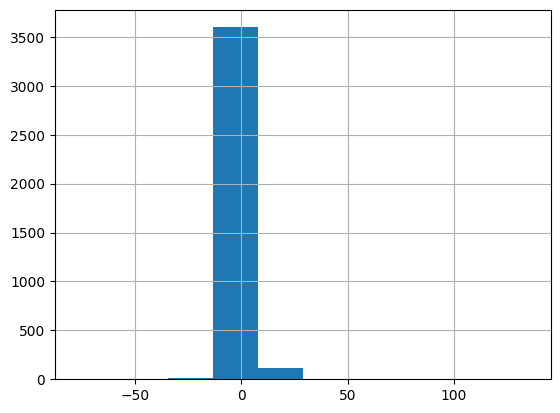

In [462]:
retorno_por ['retornos'].hist ()

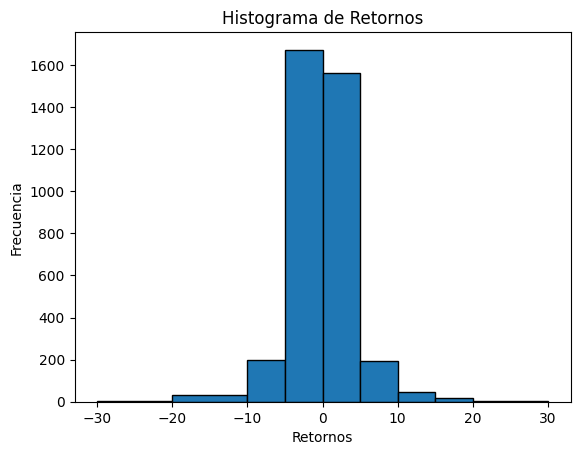

In [467]:


# Datos del histograma
data = retorno_por['retornos']

# Definir los límites de los bins para ajustar la coordenada x
bins = [-30,-20,-10, -5, 0, 5, 10, 15, 20,30]

# Graficar el histograma con los bins definidos
plt.hist(data, bins=bins, edgecolor='black')
plt.title('Histograma de Retornos')
plt.xlabel('Retornos')
plt.ylabel('Frecuencia')
plt.show()


In [470]:


def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()



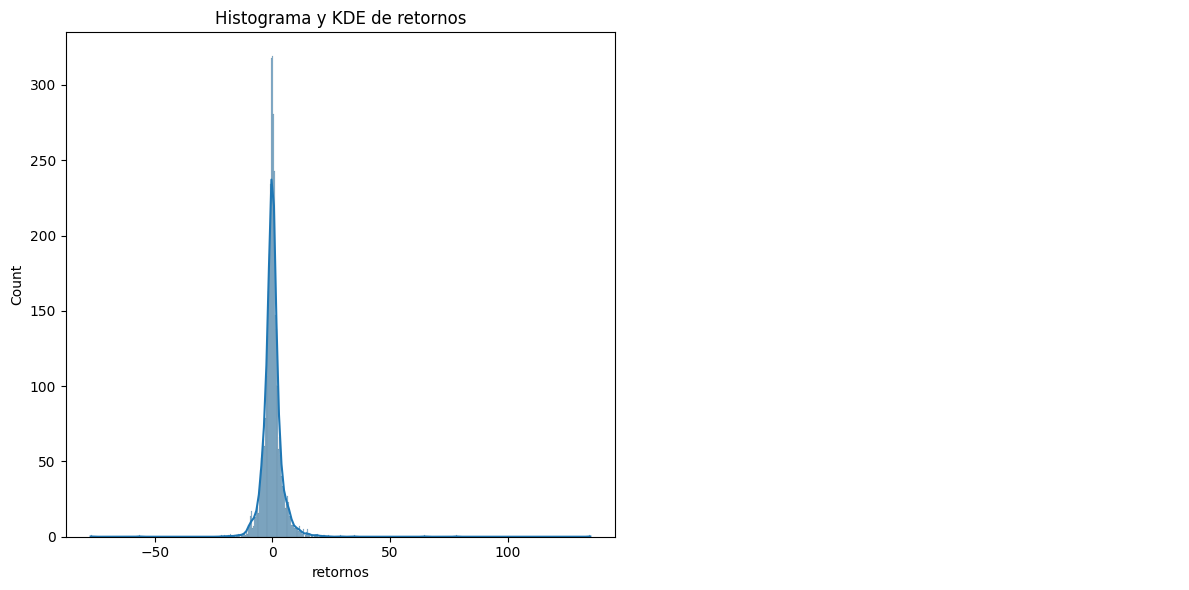

In [472]:
plot_histo_den (retorno_por, ['retornos'])

# densidad de probabilidad.  estadistica inferencial sirve para empezar con ello

# parecido a la t de student o a la normal gausiana

In [473]:

def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

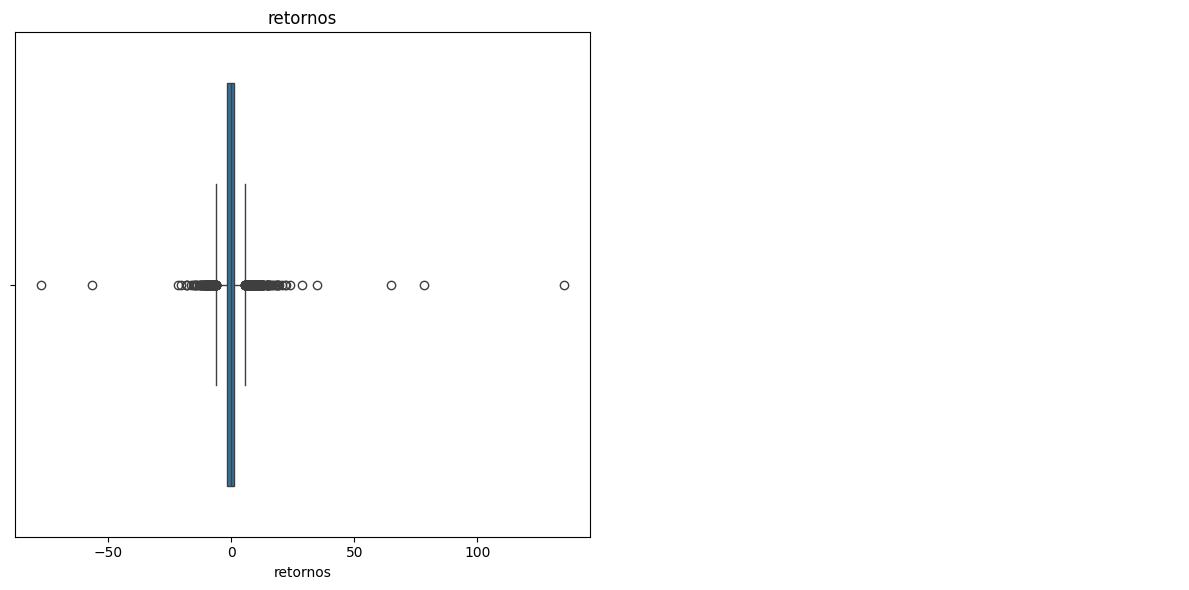

In [474]:
plot_multiple_boxplots (retorno_por, ['retornos'])

In [479]:
import plotly.graph_objects as go
import plotly.express as px

def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig = go.Figure()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            fig.add_trace(go.Histogram(x=df[column], histnorm='probability density', name=column))

    fig.update_layout(title='Histogramas y KDE',
                      xaxis_title='Valores',
                      yaxis_title='Densidad',
                      barmode='overlay')

    fig.show()

# Llamada a la función
plot_histo_den (retorno_por, ['retornos'])
